In [6]:


















# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_subfolders(base_dir, img_size):
    images = []
    labels = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')  #
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, filename)
                if os.path.isfile(file_path) and file_path.lower().endswith(valid_extensions):
                    try:
                        img = load_img(file_path, target_size=img_size)
                        img_array = img_to_array(img) / 255.0
                        images.append(img_array)
                        labels.append(subfolder)
                    except Exception as e:
                        print(f"Error loading {file_path}: {e}")
    return np.array(images), np.array(labels)

base_dir = r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel'
img_size = (224, 224)

images, labels = load_images_from_subfolders(base_dir, img_size)


In [9]:
print(images.shape)  

(4356, 224, 224, 3)


In [10]:
print(labels)  


['Bird-drop' 'Bird-drop' 'Bird-drop' ... 'Snow-Covered' 'Snow-Covered'
 'Snow-Covered']


In [11]:
# This will print the unique class labels
import numpy as np
unique_labels = np.unique(labels)
print(unique_labels)  

['Bird-drop' 'Clean' 'Dusty' 'Electrical-damage' 'Physical-Damage'
 'Snow-Covered']


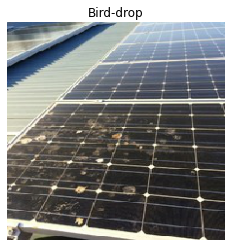

In [ ]:
import matplotlib.pyplot as plt
# Function to display an image with its label
def show_image_with_label(img_array, label):
    plt.imshow(img_array)
    plt.title(label)
    plt.axis('off')  
    plt.show()

# Display the first image and its label
show_image_with_label(images[0], labels[0])


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load a pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(img_array):
    img_array = np.expand_dims(img_array, axis=0)  
    features = base_model.predict(img_array)
    return features.flatten()

# Extract features for all images
features = []
for img in images:
    features.append(extract_features(img))
features = np.array(features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1000ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━

In [14]:
features.shape

(4356, 25088)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels_encoded = le.fit_transform(labels)

print("Class mappings:", dict(zip(le.classes_, le.transform(le.classes_))))


Class mappings: {'Bird-drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical-damage': 3, 'Physical-Damage': 4, 'Snow-Covered': 5}


In [16]:
#deal with imbalance classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features, labels_encoded)


In [ ]:
import collections
print(collections.Counter(labels_resampled))


Counter({0: 1338, 1: 1338, 2: 1338, 3: 1338, 4: 1338, 5: 1338})


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

input_shape = features_resampled.shape[1]

model = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(labels_resampled)), activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
#ensure of dtye
features_resampled = features_resampled.astype(np.float32)
labels_resampled = labels_resampled.astype(np.int64)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)
# Train the model
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.6031 - loss: 1.1004 - val_accuracy: 0.8381 - val_loss: 0.4672
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9245 - loss: 0.2343 - val_accuracy: 0.9228 - val_loss: 0.2357
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9833 - loss: 0.0777 - val_accuracy: 0.9502 - val_loss: 0.1748
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9873 - loss: 0.0491 - val_accuracy: 0.9514 - val_loss: 0.1629
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9947 - loss: 0.0300 - val_accuracy: 0.9620 - val_loss: 0.1507
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9989 - loss: 0.0102 - val_accuracy: 0.9595 - val_loss: 0.1489
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.9496 - val_loss: 0.1987
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9993 - loss: 0.0084 - va

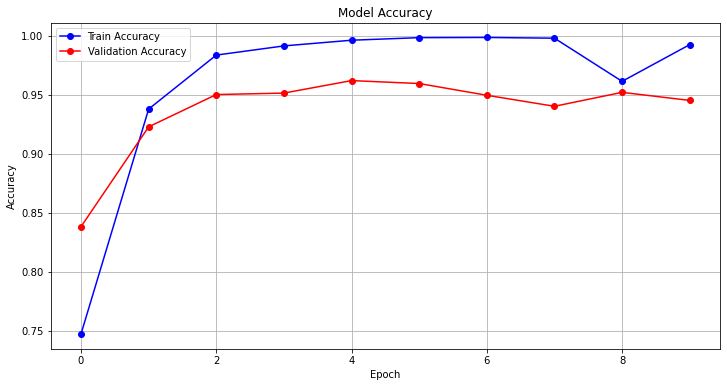

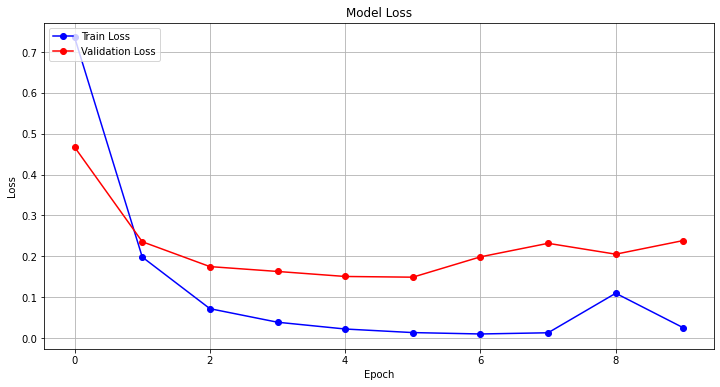

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(history.history['accuracy'], 'bo-', label='Train Accuracy')  
plt.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')  
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(history.history['loss'], 'bo-', label='Train Loss')  
plt.plot(history.history['val_loss'], 'ro-', label='Validation Loss')  
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.regularizers import l2
input_shape = features_resampled.shape[1]

model = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(len(np.unique(labels_resampled)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.5980 - loss: 2.5300 - val_accuracy: 0.8176 - val_loss: 1.0403
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8660 - loss: 0.8935 - val_accuracy: 0.7920 - val_loss: 1.0497
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8900 - loss: 0.7995 - val_accuracy: 0.8742 - val_loss: 0.8086
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9129 - loss: 0.7031 - val_accuracy: 0.8885 - val_loss: 0.7933
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9053 - loss: 0.7082 - val_accuracy: 0.8910 - val_loss: 0.7402
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9205 - loss: 0.6404 - val_accuracy: 0.8742 - val_loss: 0.7857
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.9238 - loss: 0.6181 - val_accuracy: 0.9041 - val_loss: 0.7452
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.9372 - loss: 0.5879 - 

In [24]:
# Training accuracy and loss
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Validation accuracy and loss
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


In [25]:
print(train_accuracy)

[0.7226720452308655, 0.860946774482727, 0.8906882405281067, 0.8936468362808228, 0.8924010992050171, 0.9085954427719116, 0.9028339982032776, 0.9331983923912048, 0.9137340188026428, 0.8997197151184082]


In [26]:
import numpy as np
avg_train_loss = np.mean(train_loss)
avg_train_accuracy = np.mean(train_accuracy)*100
avg_val_loss = np.mean(val_loss)
avg_val_accuracy = np.mean(val_accuracy)*100
print(f'Training Loss: {avg_train_loss:.4f}') 
print(f'Training Accuracy: {avg_train_accuracy:.4f}')
print(f'Validation Loss: {avg_val_loss:.4f}')
print(f'Validation Accuracy: {avg_val_accuracy:.4f}')

Training Loss: 0.8099
Training Accuracy: 88.1844
Validation Loss: 0.8082
Validation Accuracy: 87.0361


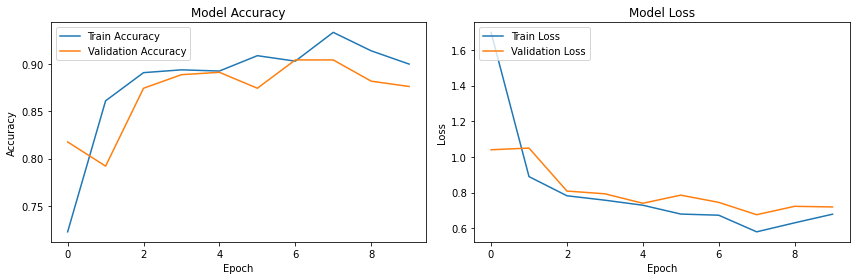

In [27]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


# saving model

In [37]:
model.save(r'C:\Users\Ayman\Desktop\ShamSoon\Faulty_solar_panel.h5')


In [38]:
import tensorflow as tf

In [39]:
keras_model = tf.keras.models.load_model('Faulty_solar_panel.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()


with open('faulty_solar_panel.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Ayman\AppData\Local\Temp\tmpe5z2z8as\assets


INFO:tensorflow:Assets written to: C:\Users\Ayman\AppData\Local\Temp\tmpe5z2z8as\assets


Saved artifact at 'C:\Users\Ayman\AppData\Local\Temp\tmpe5z2z8as'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 25088), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1327397411824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1327397411648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1327397481632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1327397481456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1327397505328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1327397505152: TensorSpec(shape=(), dtype=tf.resource, name=None)


# test

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16


model = load_model(r'C:\Users\Ayman\Desktop\ShamSoon\Faulty_solar_panel.h5')


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def preprocess_and_extract_features(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    
    if image is None:
        raise ValueError("Error: Could not load the image.")
    
    
    image = cv2.resize(image, target_size)
    
    
    image = image / 255.0
    
    
    img_array = np.expand_dims(image, axis=0)  
    features = features.flatten()
    

    features = np.expand_dims(features, axis=0)
    
    return features

def test_model(image_path):
    features = preprocess_and_extract_features(image_path)
    
    
    prediction = model.predict(features)
    
    
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class


class_labels =['Bird-drop','Clean','Dusty','Electrical-damage','Physical-Damage',
 'Snow-Covered']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels_resampled)  

test_image_path =r'C:\Users\Ayman\Desktop\ShamSoon\damage2.png'


predicted_class_index = test_model(test_image_path)


predicted_class_label = le.inverse_transform(predicted_class_index)

print(f'Predicted class: {predicted_class_label[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Predicted class: Snow-Covered


In [ ]:
print(model.input_shape)


# deployment

In [ ]:
from markupsafe import escape


In [ ]:
from flask import Flask, request, jsonify
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from markupsafe import escape  
from sklearn.preprocessing import LabelEncoder

app = Flask(__name__)

# Load your pre-trained model
model = load_model(r'C:\Users\Ayman\Desktop\ShamSoon\Faulty_solar_panel.h5')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

labels_resampled = ['Bird-drop','Clean','Dusty','Electrical-damage','Physical-Damage',
 'Snow-Covered']
le = LabelEncoder()
le.fit(labels_resampled)

def preprocess_and_extract_features(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Error: Could not load the image.")
    
   
    image = cv2.resize(image, target_size)
    
    
    image = image / 255.0
    
    
    img_array = np.expand_dims(image, axis=0) 
    features = base_model.predict(img_array)
    features = features.flatten()
    
    
    features = np.expand_dims(features, axis=0)  
    
    return features

@app.route('/predict', methods=['POST'])
def predict_endpoint():
    if 'file' not in request.files:
        return jsonify({"error": "No file part"}), 400

    file = request.files['file']
    if file.filename == '':
        return jsonify({"error": "No selected file"}), 401

    
    file_path = 'temp_image.png'
    file.save(file_path)
    
    
    try:
        features = preprocess_and_extract_features(file_path)
    except ValueError as e:
        return jsonify({"error": str(e)}), 402

   
    prediction = model.predict(features)
    predicted_class_index = np.argmax(prediction, axis=1)
    predicted_class_label = le.inverse_transform(predicted_class_index)

    return jsonify({"prediction": predicted_class_label[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1